#### IMPORT LIBRARIES

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
RestaurantR = pd.read_csv('/Users/da_m1_39/Downloads/Restaurant.csv')

RestaurantR

,id,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,CID X LOC_NUM X VENDOR,latitude_y,longitude_y,akeed_customer_id,gender,status_y,verified_y,language_y,created_at,updated_at_y
0,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,...,TBOTOCJ X 0 X 4,-0.603303,-78.519610,TBOTOCJ,Male,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
1,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,...,TBOTOCJ X 0 X 4,-0.603823,0.752779,TBOTOCJ,Male,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
2,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,...,TBOTOCJ X 0 X 4,-0.603303,-78.519610,TBOTOCJ,Male,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
3,4,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,...,TBOTOCJ X 0 X 4,-0.603823,0.752779,TBOTOCJ,Male,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
4,188,118786.0,-0.405660,0.644401,Restaurants,2.0,0.7,8.0,1.0,11:59AM-10:45PM,...,TBOTOCJ X 0 X 188,-0.603303,-78.519610,TBOTOCJ,Male,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385737,907,132953.0,13.335131,-1.449556,Restaurants,2.0,0.7,12.0,1.0,9-22,...,6PY2OK5 X 0 X 907,12.452181,-1.444149,6PY2OK5,Female,1,1,EN,2020-02-05 22:20:58,2020-02-05 22:21:40
385738,907,132953.0,13.335131,-1.449556,Restaurants,2.0,0.7,12.0,1.0,9-22,...,UPNI9BV X 0 X 907,14.521414,-1.406357,UPNI9BV,Female,1,1,EN,2020-03-02 20:12:13,2020-03-02 20:12:38
385739,907,132953.0,13.335131,-1.449556,Restaurants,2.0,0.7,12.0,1.0,9-22,...,U6PTUT5 X 0 X 907,13.315578,-1.383475,U6PTUT5,Female,1,1,EN,2020-02-04 20:42:16,2020-02-04 20:44:30
385740,907,132953.0,13.335131,-1.449556,Restaurants,2.0,0.7,12.0,1.0,9-22,...,MSEGQHZ X 0 X 907,13.349885,-1.386949,MSEGQHZ,Female,1,1,EN,2020-03-03 04:23:00,2020-03-03 04:23:26


In [4]:
RestaurantR.corr()

/var/folders/40/hpv0h46j20gg7j7wlhwpz6f80000gq/T/ipykernel_14552/1321748157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  RestaurantR.corr()


,id,authentication_id,latitude_x,longitude_x,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,commission,...,payment_mode,vendor_discount_amount,driver_rating,deliverydistance,preparationtime,LOCATION_NUMBER,latitude_y,longitude_y,status_y,verified_y
id,1.000000,0.778101,0.011869,-0.012279,0.035166,0.015579,-0.102440,0.047839,-0.274507,NaN,...,-0.016564,-0.009130,0.091648,0.145077,-0.182317,0.132380,0.032889,0.097798,0.003999,-0.052510
authentication_id,0.778101,1.000000,-0.007579,-0.029558,-0.074139,-0.146521,-0.259331,0.098747,-0.238064,NaN,...,-0.025140,-0.005945,0.054277,0.042863,-0.214536,0.096445,0.034625,0.082195,0.002484,-0.049229
latitude_x,0.011869,-0.007579,1.000000,0.995626,0.233284,0.072825,-0.033513,0.031087,0.017832,NaN,...,-0.020837,-0.001997,-0.026412,-0.065794,0.017990,-0.037827,0.003214,-0.019797,0.001641,0.005103
longitude_x,-0.012279,-0.029558,0.995626,1.000000,0.229422,0.074291,-0.080834,0.041471,0.019241,NaN,...,-0.011017,-0.002669,-0.025075,-0.070585,0.014076,-0.028755,0.000574,-0.023984,0.001571,0.009853
vendor_category_id,0.035166,-0.074139,0.233284,0.229422,1.000000,-0.100551,0.047412,-0.068371,0.188643,NaN,...,-0.026119,0.010394,-0.024983,-0.036417,0.029921,-0.053841,0.000988,-0.003844,0.003592,-0.001359
delivery_charge,0.015579,-0.146521,0.072825,0.074291,-0.100551,1.000000,0.036749,-0.247406,0.139475,NaN,...,0.045147,0.011197,-0.039472,-0.090173,0.043778,-0.016924,-0.004166,-0.031364,-0.001028,0.017585
serving_distance,-0.102440,-0.259331,-0.033513,-0.080834,0.047412,0.036749,1.000000,-0.188804,0.029041,NaN,...,-0.067891,0.002892,-0.017507,0.062479,0.115325,-0.082502,0.001454,0.002873,0.003027,-0.001165
is_open,0.047839,0.098747,0.031087,0.041471,-0.068371,-0.247406,-0.188804,1.000000,-0.253536,NaN,...,0.027778,0.008552,0.087019,0.212176,0.019009,0.110479,0.004264,0.057649,0.000077,-0.012635
prepration_time,-0.274507,-0.238064,0.017832,0.019241,0.188643,0.139475,0.029041,-0.253536,1.000000,NaN,...,0.008562,0.011414,-0.053139,-0.134415,0.204721,-0.083620,-0.005983,-0.051534,0.008202,0.020318
commission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


   serving_distance  vendor_rating_x
0               2.0         4.500000
1               3.0         4.200000
2               5.0         4.503282
3               6.0         4.464657
4               7.0         4.300000
5               8.0         4.486055
6              10.0         4.292285
7              12.0         4.300000
8              14.0         4.400000
9              15.0         4.390857


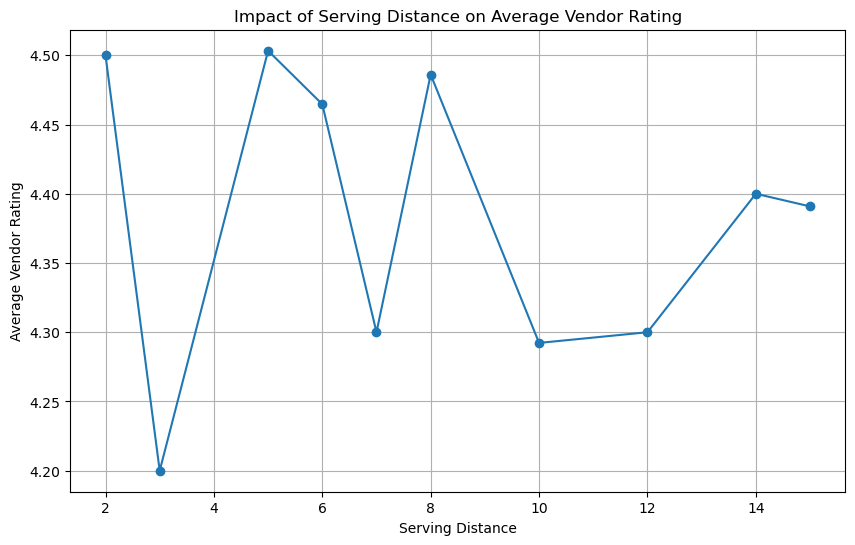

In [19]:


# Group the data based on serving distance and calculate the average vendor rating for each group
grouped_data = RestaurantR.groupby('serving_distance')['vendor_rating_x'].mean().reset_index()

# Print the grouped data
print(grouped_data)

# Visualize the relationship using a line plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped_data['serving_distance'], grouped_data['vendor_rating_x'], marker='o')
plt.xlabel('Serving Distance')
plt.ylabel('Average Vendor Rating')
plt.title('Impact of Serving Distance on Average Vendor Rating')
plt.grid(True)
plt.show()


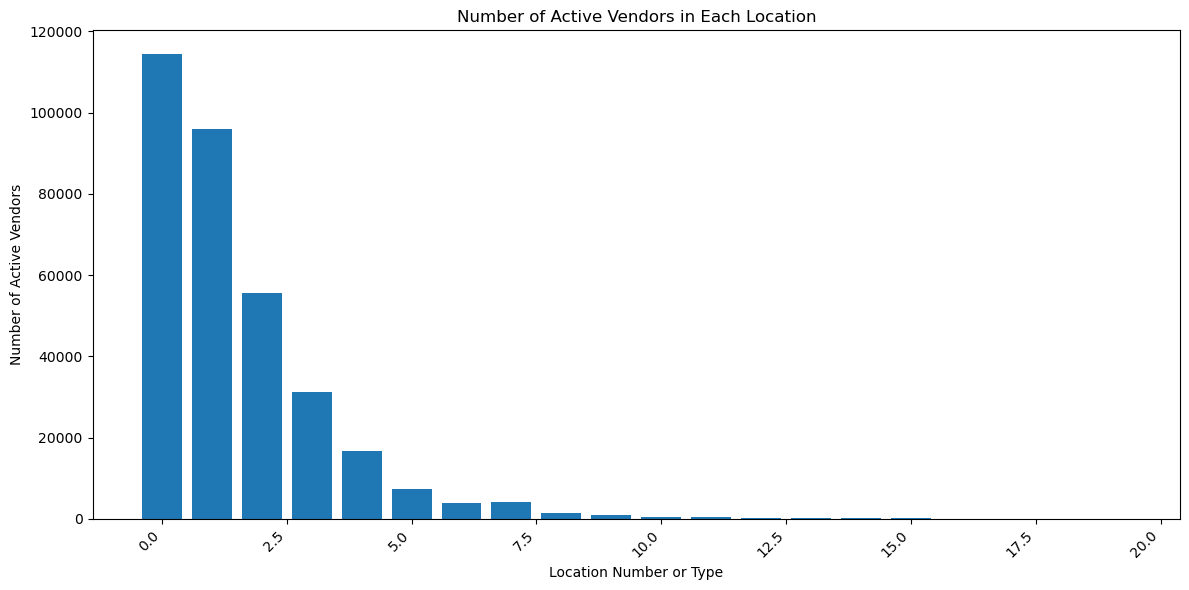

In [24]:


# Assuming 'LOCATION_NUMBER' is the column for location numbers or types and 'is_open' for vendor activity
# Replace them with the actual column names from your dataset
location_data =  RestaurantR.groupby('LOCATION_NUMBER')['is_open'].sum().reset_index()

# Sort the data in descending order to find the locations with the most active vendors
sorted_location_data = location_data.sort_values(by='is_open', ascending=False)

# Visualize the data using a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_location_data['LOCATION_NUMBER'], sorted_location_data['is_open'])
plt.xlabel('Location Number or Type')
plt.ylabel('Number of Active Vendors')
plt.title('Number of Active Vendors in Each Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Locations with the most active vendors:
0    114511
1     95939
2     55649
3     31236
4     16641
5      7356
7      4187
6      3911
8      1547
9       939
Name: LOCATION_NUMBER, dtype: int64


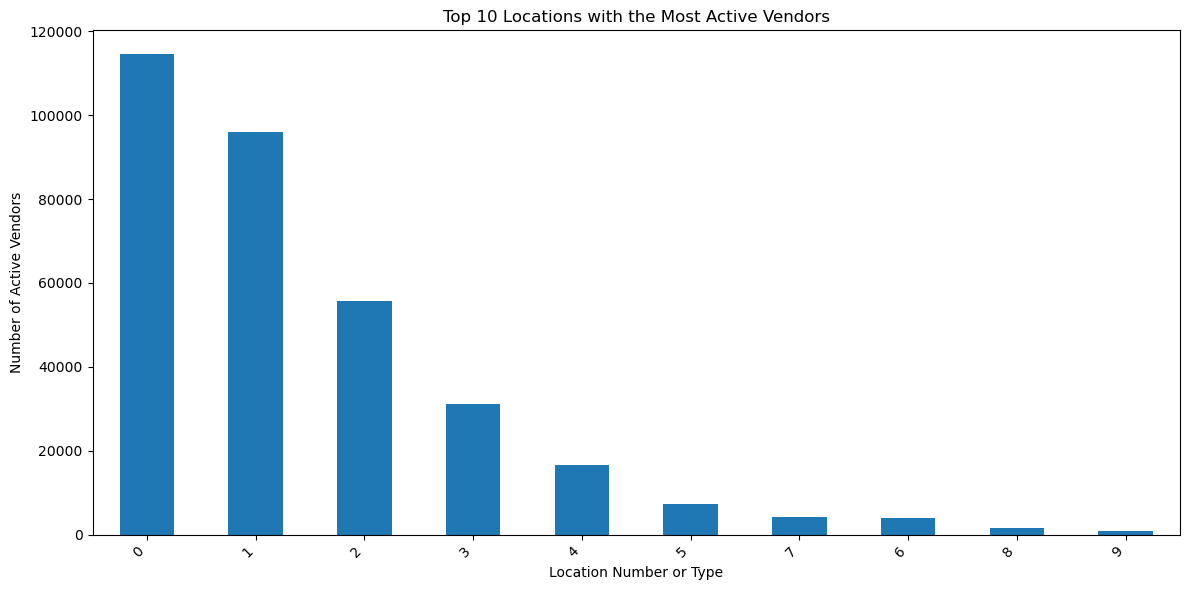

In [25]:

# Assuming 'LOCATION_NUMBER' is the column for location numbers or types and 'is_open' for vendor activity
# Replace them with the actual column names from your dataset
active_vendors = RestaurantR[RestaurantR['is_open'] == 1]
location_counts = active_vendors['LOCATION_NUMBER'].value_counts()

# Print the locations with the most active vendors
print("Locations with the most active vendors:")
print(location_counts.head(10))  # Change the number to display more or fewer locations

# You can also plot the result using a bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
location_counts.head(10).plot(kind='bar')
plt.xlabel('Location Number or Type')
plt.ylabel('Number of Active Vendors')
plt.title('Top 10 Locations with the Most Active Vendors')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [26]:


# Assuming 'gender' is the column for customer gender and 'vendor_category_en' for vendor categories
# Replace them with the actual column names from your dataset
cross_tab = pd.crosstab(RestaurantR['gender'], RestaurantR['vendor_category_en'])

# Print the cross-tabulation
print(cross_tab)

# You can also calculate the correlation between the two variables
correlation = cross_tab.corr()
print("Correlation between gender and vendor categories:")
print(correlation)


vendor_category_en  Restaurants  Sweets & Bakes
gender                                         
                             30              30
Female                    24094            2574
Female                       28               0
Female                      151              15
Female                       58               0
Female                       98               4
Male                     309877           34595
Male                        395              51
male                      12753             989
Correlation between gender and vendor categories:
vendor_category_en  Restaurants  Sweets & Bakes
vendor_category_en                             
Restaurants            1.000000        0.999919
Sweets & Bakes         0.999919        1.000000


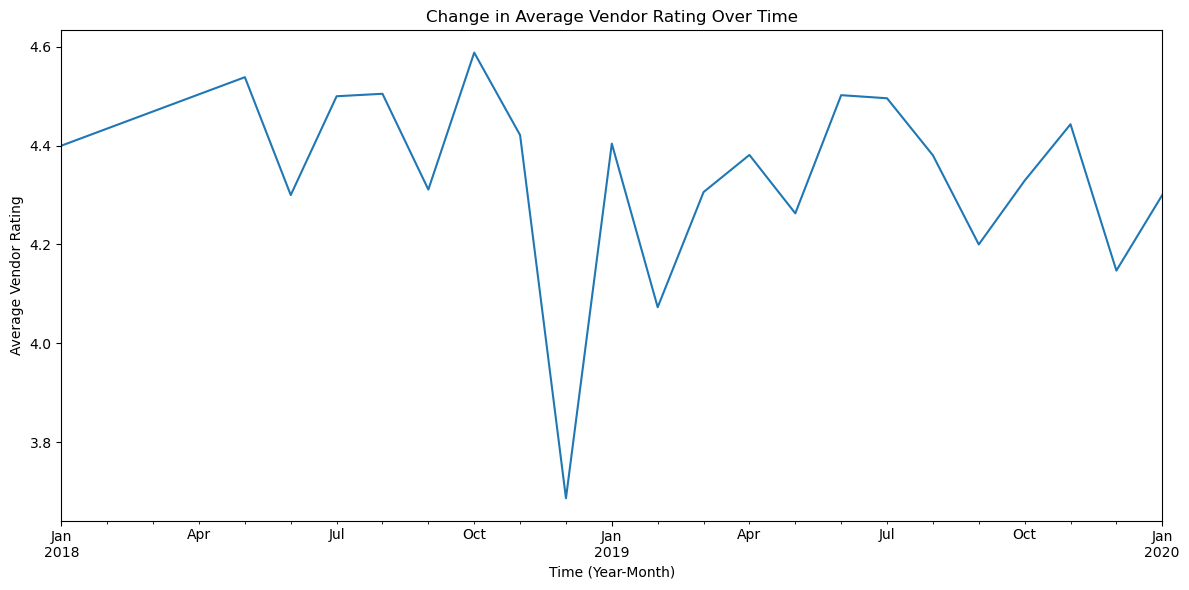

In [29]:


# Assuming 'created_at_x' is the column representing the time the vendor rating was created
# and 'vendor_rating_x' is the column for vendor ratings
# Replace them with the actual column names from your dataset
RestaurantR['created_at_x'] = pd.to_datetime(RestaurantR['created_at_x'])  # Convert the column to datetime type

# Group the data by the month of the 'created_at_x' and calculate the average vendor rating for each month
average_rating_by_month = RestaurantR.groupby(RestaurantR['created_at_x'].dt.to_period('M'))['vendor_rating_x'].mean()

# Create a line plot to visualize the change in average vendor rating over time
plt.figure(figsize=(12, 6))
average_rating_by_month.plot(kind='line')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Vendor Rating')
plt.title('Change in Average Vendor Rating Over Time')
plt.tight_layout()
plt.show()


Distribution of Vendor Categories:
Restaurants       347484
Sweets & Bakes     38258
Name: vendor_category_en, dtype: int64


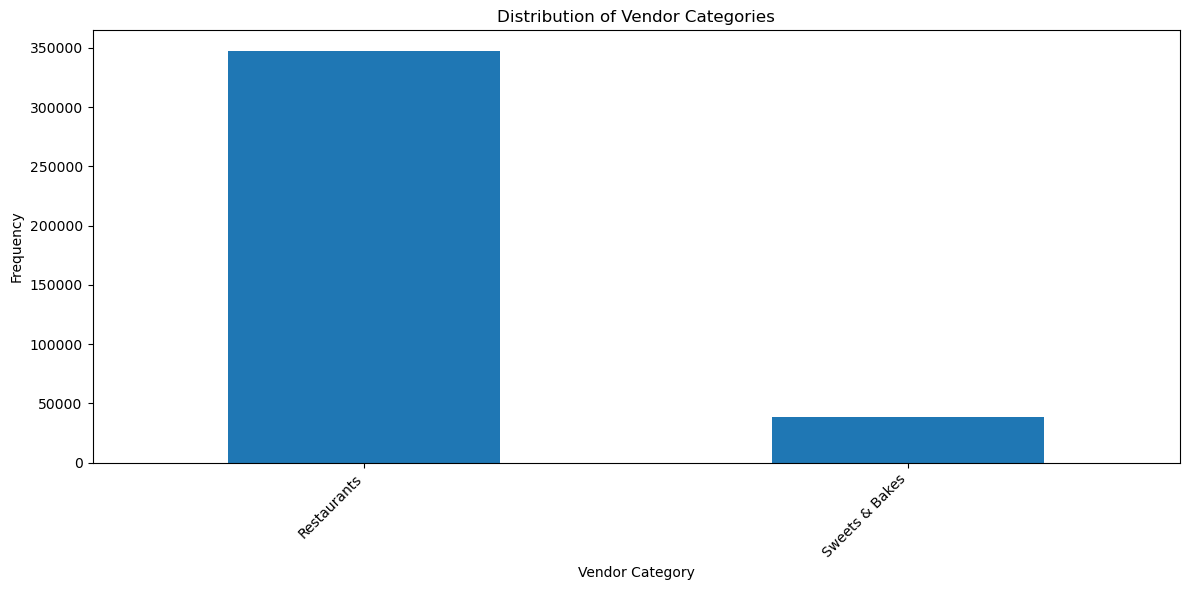

In [30]:

vendor_category_counts = RestaurantR['vendor_category_en'].value_counts()

# Display the distribution of vendor categories
print("Distribution of Vendor Categories:")
print(vendor_category_counts)

#  showing the distribution using a bar graph
plt.figure(figsize=(12, 6))
vendor_category_counts.plot(kind='bar')
plt.xlabel('Vendor Category')
plt.ylabel('Frequency')
plt.title('Distribution of Vendor Categories')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


In [31]:

vendor_category_counts = RestaurantR['vendor_category_en'].value_counts()

# Find the category with the highest number of vendors
category_with_highest_vendors = vendor_category_counts.idxmax()

print("Category with the highest number of vendors:", category_with_highest_vendors)


Category with the highest number of vendors: Restaurants


Average Delivery Charge by Vendor Category:
vendor_category_en
Restaurants       0.368439
Sweets & Bakes    0.230869
Name: delivery_charge, dtype: float64


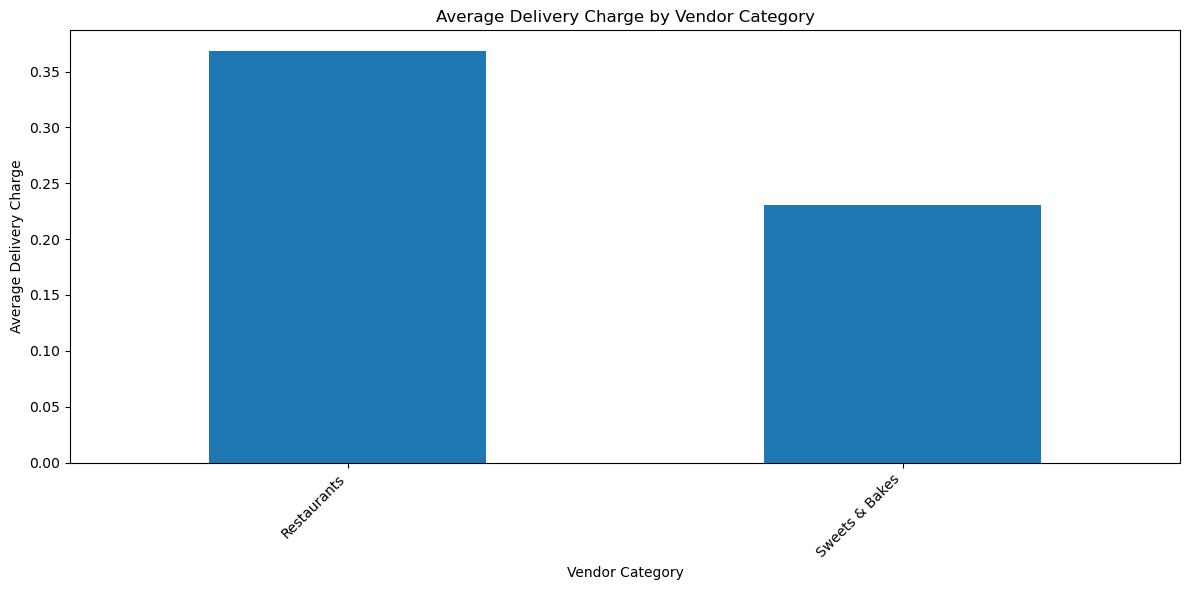

In [32]:


average_delivery_charge_by_category = RestaurantR.groupby('vendor_category_en')['delivery_charge'].mean()

# Display the average delivery charge for each category
print("Average Delivery Charge by Vendor Category:")
print(average_delivery_charge_by_category)

# Create a bar graph to visualize the average delivery charge for each category
plt.figure(figsize=(12, 6))
average_delivery_charge_by_category.plot(kind='bar')
plt.xlabel('Vendor Category')
plt.ylabel('Average Delivery Charge')
plt.title('Average Delivery Charge by Vendor Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


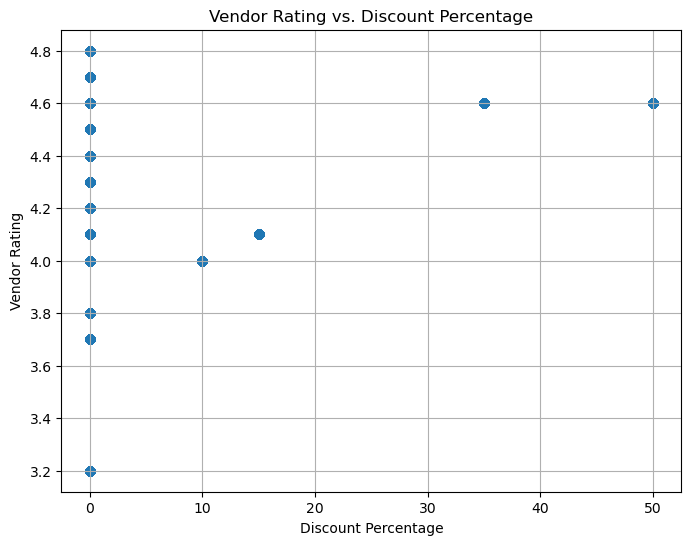

In [37]:


vendor_rating = RestaurantR['vendor_rating_x']
discount_percentage = RestaurantR['discount_percentage']

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
plt.scatter(discount_percentage, vendor_rating, alpha=0.5)
plt.xlabel('Discount Percentage')
plt.ylabel('Vendor Rating')
plt.title('Vendor Rating vs. Discount Percentage')
plt.grid(True)  # Add gridlines for better visualization
plt.show()


Average Order Preparation Time by Vendor:
vendor_id
4      15.0
13     14.0
20     19.0
23     16.0
28     10.0
       ... 
849    10.0
855    10.0
856    10.0
858    10.0
907    20.0
Name: prepration_time, Length: 100, dtype: float64


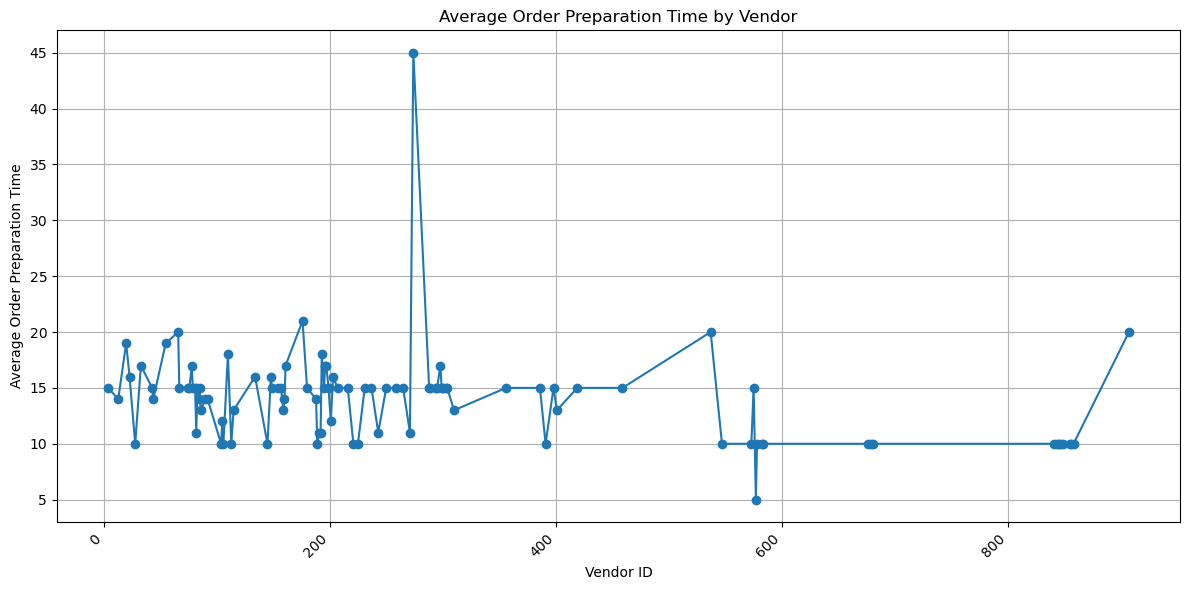

In [41]:



# Assuming 'vendor_id' is the column for vendor IDs
# and 'prepration_time' is the column for preparation time
# Replace them with the actual column names from your dataset
average_prep_time_by_vendor = RestaurantR.groupby('vendor_id')['prepration_time'].mean()

# Display the average preparation time for each vendor
print("Average Order Preparation Time by Vendor:")
print(average_prep_time_by_vendor)

# Create a line graph to visualize the average preparation time for each vendor
plt.figure(figsize=(12, 6))
average_prep_time_by_vendor.plot(kind='line', marker='o')
plt.xlabel('Vendor ID')
plt.ylabel('Average Order Preparation Time')
plt.title('Average Order Preparation Time by Vendor')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(True)  # Add gridlines for better visualization
plt.show()

plt.show()


Proportion of Vendors that are Open vs. Closed:
1.0    86.489415
0.0    13.510585
Name: is_open, dtype: float64


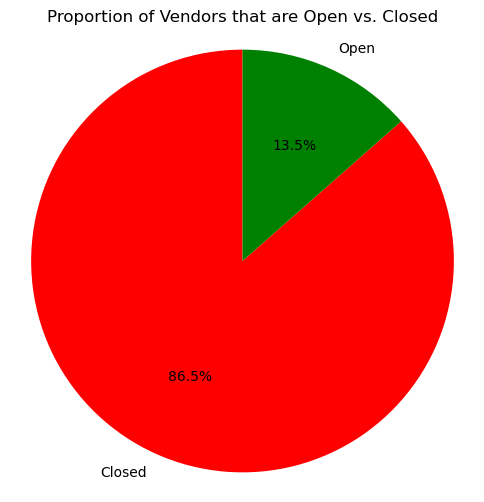

In [42]:


# Assuming 'is_open' is the column for vendor's status (1 for open, 0 for closed)
# Replace it with the actual column name from your dataset
vendor_status_counts = RestaurantR['is_open'].value_counts()

# Calculate the proportion of vendors that are open and closed
proportions = vendor_status_counts / len(RestaurantR) * 100

# Display the proportions
print("Proportion of Vendors that are Open vs. Closed:")
print(proportions)

# Create a pie chart to visualize the proportions
plt.figure(figsize=(6, 6))
plt.pie(proportions, labels=['Closed', 'Open'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Proportion of Vendors that are Open vs. Closed')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()


Top 5 Customers with the Highest Number of Orders:
4Y0K8NQ    1710
XW90EAP    1572
HJFTTGW    1408
UO5X10D    1176
V2A9RXW    1155
Name: customer_id, dtype: int64


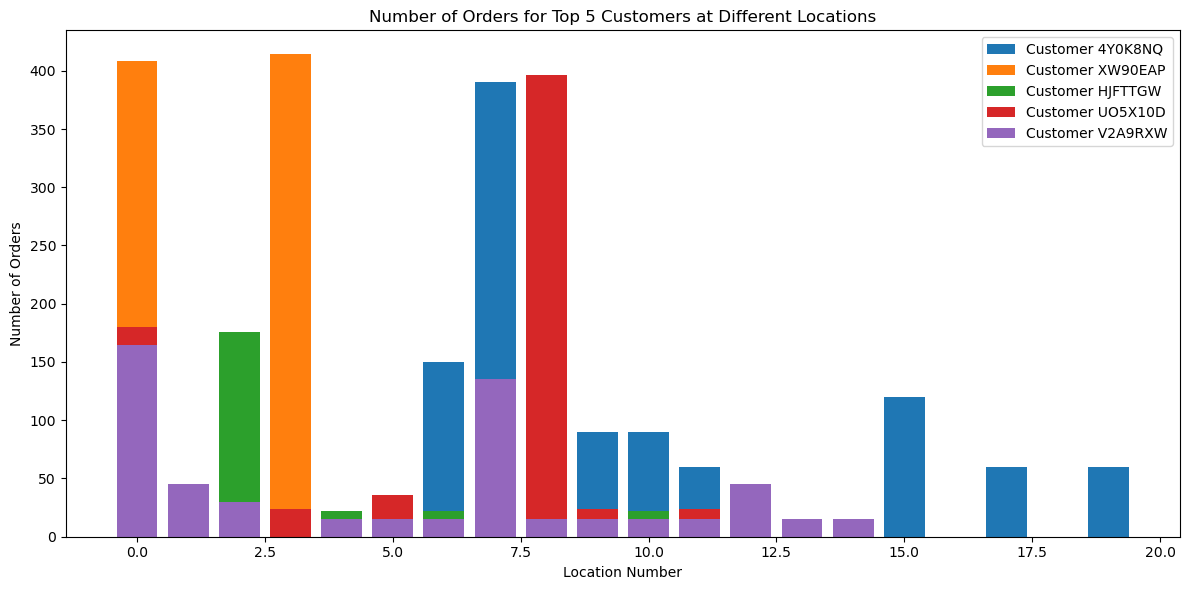

In [44]:



customer_order_counts = RestaurantR['customer_id'].value_counts()

# Get the top 5 customers with the highest number of orders
top_5_customers = customer_order_counts.head(5)

# Display the top 5 customers with their order counts
print("Top 5 Customers with the Highest Number of Orders:")
print(top_5_customers)



# Group the data by 'customer_id', 'location_number', and 'vendor_id'
customer_location_vendor_group = RestaurantR.groupby(['customer_id', 'LOCATION_NUMBER', 'vendor_id']).size().reset_index(name='order_count')

# Create a bar graph to visualize the number of orders for the top 5 customers at different locations
plt.figure(figsize=(12, 6))
for customer_id in top_5_customers.index:
    customer_data = customer_location_vendor_group[customer_location_vendor_group['customer_id'] == customer_id]
    plt.bar(customer_data['LOCATION_NUMBER'], customer_data['order_count'], label=f'Customer {customer_id}')

plt.xlabel('Location Number')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Top 5 Customers at Different Locations')
plt.legend()
plt.tight_layout()
plt.show()


Most Popular Primary Tags by Vendor Category:
              primary_tags vendor_category_en  vendor_count
10  {"primary_tags":"134"}        Restaurants         52823
47  {"primary_tags":"336"}     Sweets & Bakes          8642


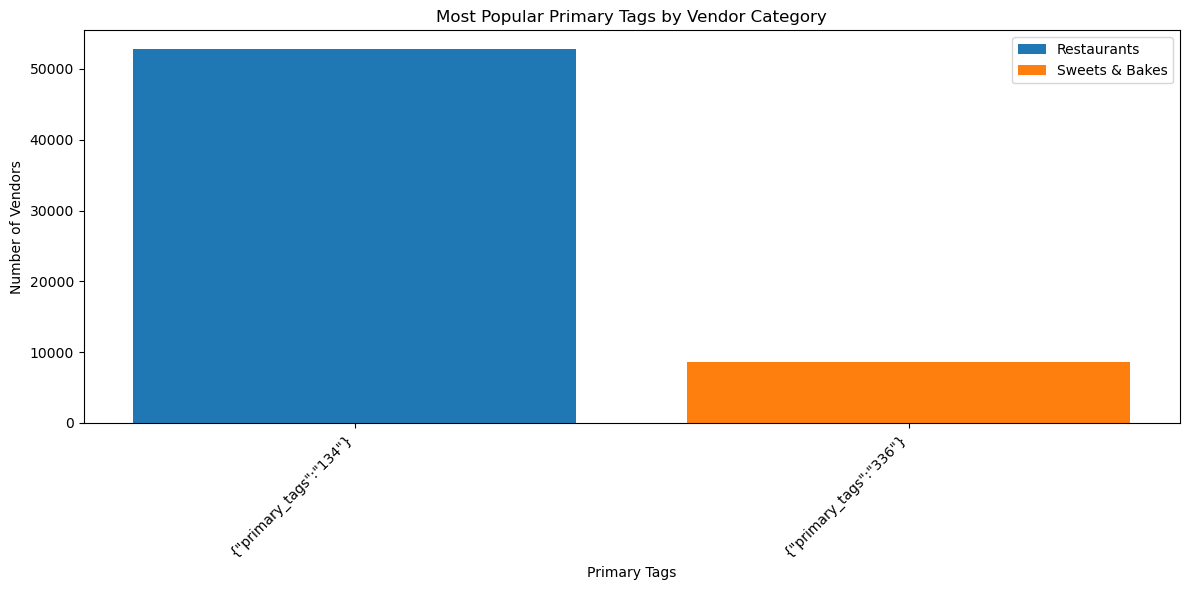

In [45]:


# Group the data by 'primary_tags' and 'vendor_category_en' and count the number of vendors in each group
popular_tags_by_category =  RestaurantR.groupby(['primary_tags', 'vendor_category_en']).size().reset_index(name='vendor_count')

# Find the most popular primary tag for each vendor category
most_popular_tags = popular_tags_by_category.loc[popular_tags_by_category.groupby('vendor_category_en')['vendor_count'].idxmax()]

# Display the most popular primary tags for each vendor category
print("Most Popular Primary Tags by Vendor Category:")
print(most_popular_tags)

# Create a bar graph to visualize the most popular primary tags for each vendor category
plt.figure(figsize=(12, 6))
for category in most_popular_tags['vendor_category_en']:
    category_data = most_popular_tags[most_popular_tags['vendor_category_en'] == category]
    plt.bar(category_data['primary_tags'], category_data['vendor_count'], label=category)

plt.xlabel('Primary Tags')
plt.ylabel('Number of Vendors')
plt.title('Most Popular Primary Tags by Vendor Category')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


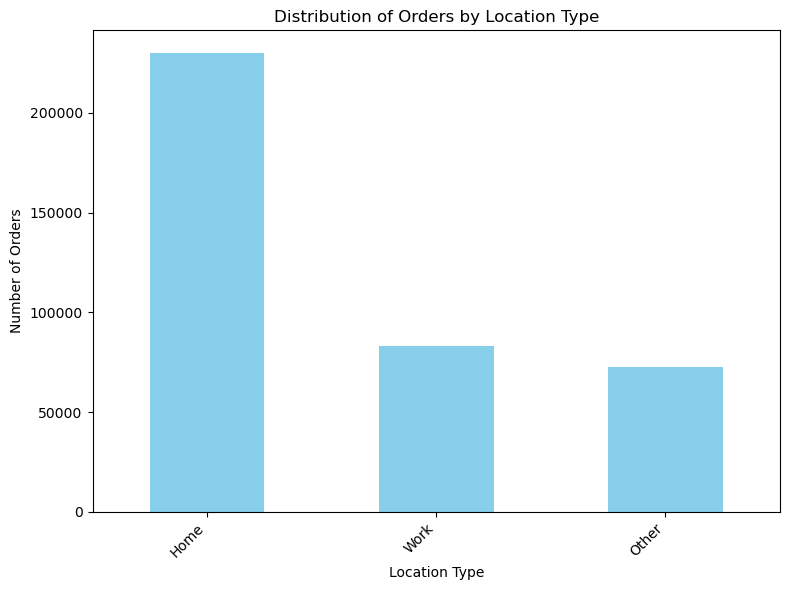

In [46]:


# Group the data by 'LOCATION_TYPE' and count the number of orders in each group
location_type_counts = RestaurantR['LOCATION_TYPE'].value_counts()

# Create a bar graph to visualize the distribution of orders for each location type
plt.figure(figsize=(8, 6))
location_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Location Type')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Location Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
